In [1]:
#Video games: Exploratory Data Analysis & Model building

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#== import video games data
vg_data = pd.read_csv('/home/arnold/Desktop/Data_Glacier/Week4/FlaskDeployment/vgsales.csv')

In [4]:
#=== Data understanding
#Inspection of variables
vg_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#Shape, Columns & column names
print(vg_data.shape)
print("Number of columns: ",len(vg_data.columns))
print("column names: ", vg_data.columns.tolist())

(16598, 11)
Number of columns:  11
column names:  ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [6]:
#Data types
vg_data.info()
print(vg_data.dtypes)
#Categorical variables: Name, Platform, Genre, Publisher
#Numerical variables: Rank, Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype:

In [7]:
#Drop any duplicate rows
vg_data.drop_duplicates(inplace=True)
#Set the rank as the index for dataset
vg_data.set_index('Rank', inplace=True)
#Data shape
vg_data.shape

(16598, 10)

In [8]:
#Check for missing values 
print(vg_data.isna().sum())
#Visualize missing values in a table
data_info= pd.DataFrame({'Attributes':vg_data.columns})
data_info["Type"]= data_info["Attributes"].apply(lambda x: vg_data[x].dtypes)
data_info["count_NA"] = data_info["Attributes"].apply(lambda x: vg_data[x].isna().sum())
data_info["Percentage_NA"] = data_info["Attributes"].apply(lambda x: vg_data[x].isna().mean())
data_info

#Missing values are present in two attributes in very low proportions

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


,Attributes,Type,count_NA,Percentage_NA
0,Name,object,0,0.000000
1,Platform,object,0,0.000000
2,Year,float64,271,0.016327
3,Genre,object,0,0.000000
4,Publisher,object,58,0.003494
5,NA_Sales,float64,0,0.000000
6,EU_Sales,float64,0,0.000000
7,JP_Sales,float64,0,0.000000
8,Other_Sales,float64,0,0.000000
9,Global_Sales,float64,0,0.000000


In [9]:
#drop year column
vg_data.drop("Year", axis=1, inplace=True)
#fill in missing values in publisher with its mode value
vg_data["Publisher"] = vg_data["Publisher"].fillna(vg_data["Publisher"].mode()[0]).reset_index(drop=True)
#Check for null values
print(vg_data.isna().sum())
#Our dataset looks like
vg_data.head()

Name            0
Platform        0
Genre           0
Publisher       3
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
#=== Descriptive analysis
num_col= ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']  #Numerical columns
cat_col= ['Name', 'Platform', 'Genre', 'Publisher']  #Categorical columns
#== Inspection of numerical variables
vg_data[num_col].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


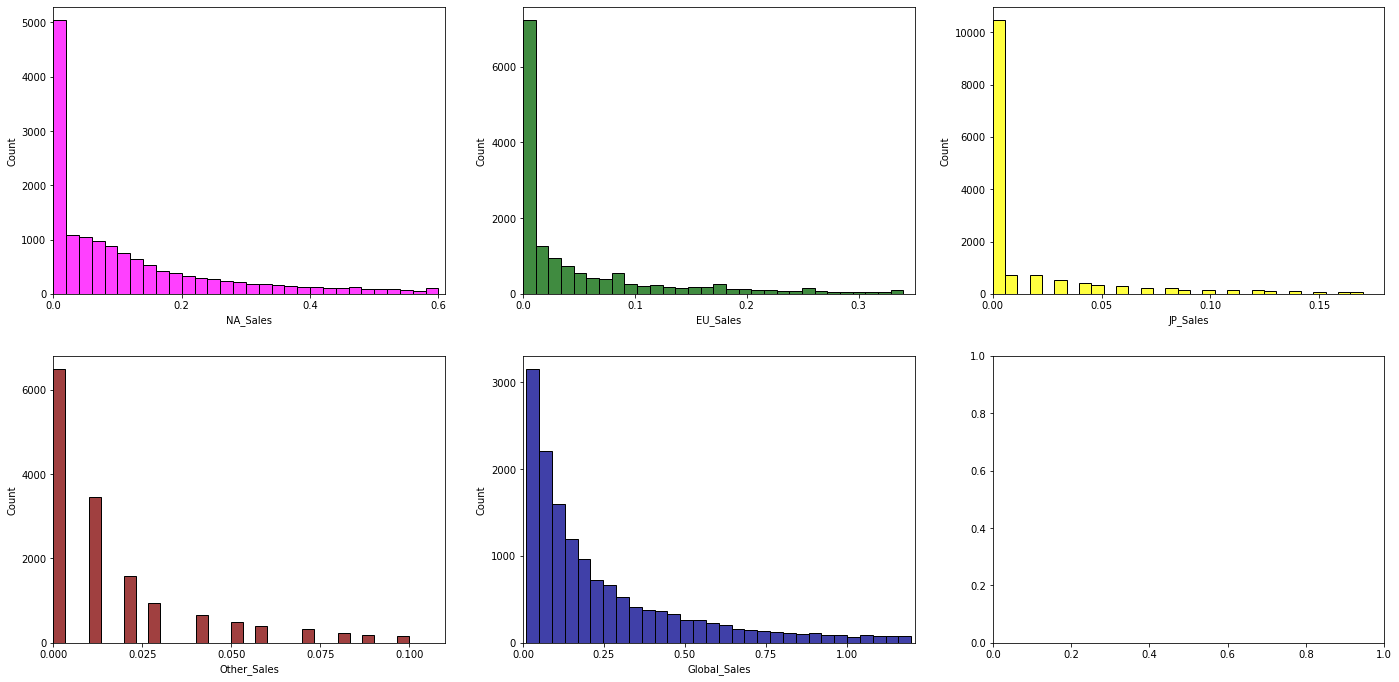

In [11]:
#== Distribution of sales 
#cluster sales into bins and display as histograms
#The min, quantiles(25%,50%,75%), and max values, indicate that the distribution is extremely 
#skewed to the right therefore we truncate outliers using 90% quantile

#Initialize plot parameters
fig, ax= plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax_index=[ax[0,0],ax[0,1],ax[0,2],ax[1,0],ax[1,1]]
color=['magenta','darkgreen','yellow','maroon','darkblue']

#Plot each sales distribution
for i in range(5):
    q = vg_data[num_col[i]].quantile(0.9)    #find 90% quantile
    mask= vg_data[num_col[i]]< q                #Extract values less than the 90% quantile
    sns.histplot(x=num_col[i], 
                 data=vg_data[num_col][mask], 
                 color=color[i],
                 ax=ax_index[i],
                 bins=30, 
                 edgecolor='black')
    ax_index[i].set_xlim(0,q)
sns.set(font_scale=2)
fig.tight_layout()
#All sales are extremely skewed to the right

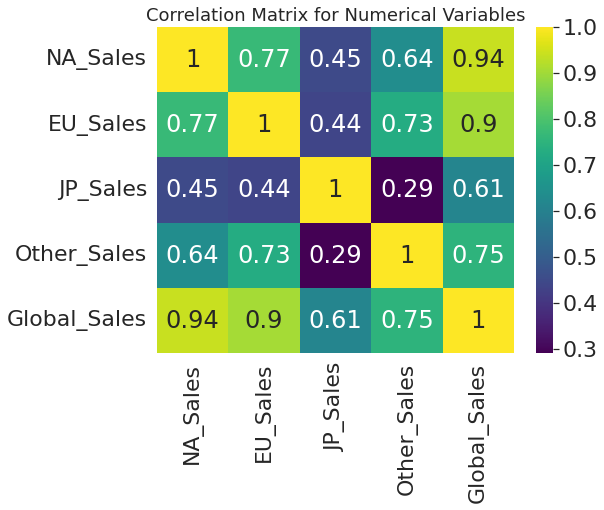

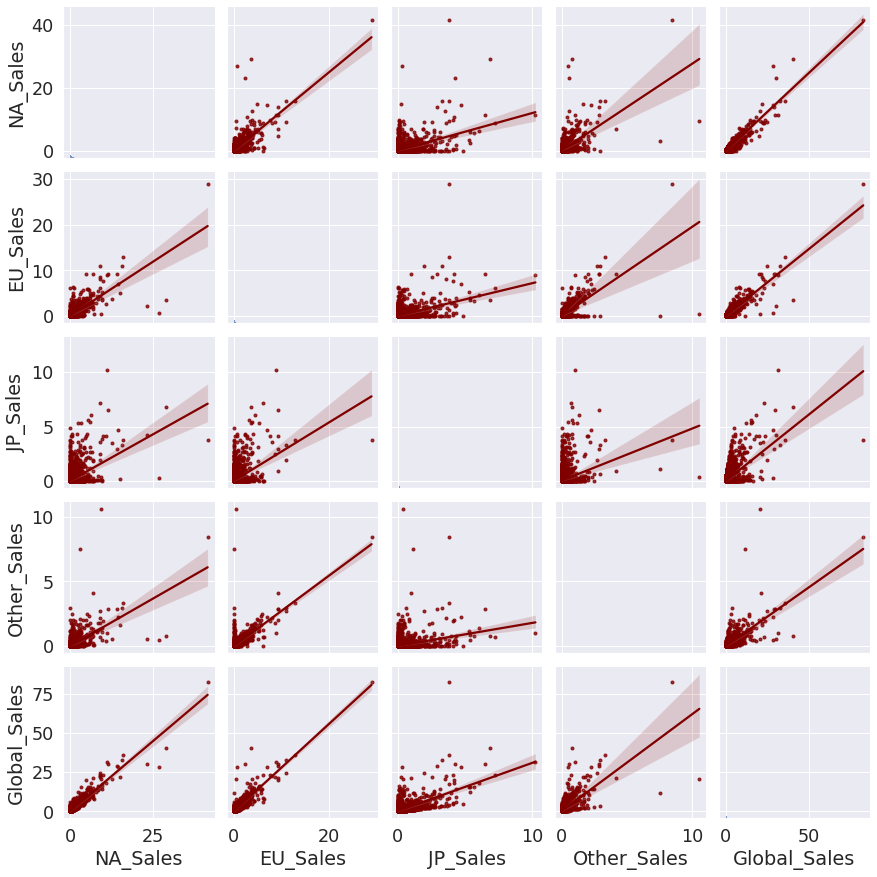

In [12]:
#== Sales relationships
#Correlation
sales_corr = vg_data[num_col].corr()
sales_corr
#Correlation heatmap
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(vg_data[num_col].corr().round(3), 
            annot=True, 
            cmap='viridis', 
            ax=ax)
ax.set_title('Correlation Matrix for Numerical Variables', fontsize=18);
sns.set(font_scale=1.6)
#It is clear that NA_Sales and Global_Sales are highly correlated

#Visualize their scatter plots and linear regression lines
sns.pairplot(data=vg_data[num_col], 
             kind='reg', 
             plot_kws={'marker':'.','color':'maroon'}, 
             height=2.5)

In [13]:
#=== Inspection of categorical variables. 
# value counts
for col in cat_col:
    print(col)
    print(vg_data[col].value_counts().to_frame().sort_values(col,ascending=False).head(10)) #count then sort
    print("Total unique entities per category: ",vg_data[col].nunique())
    print("Total count per category: ",vg_data[col].value_counts().sum())
    print("\n")   

#Dividing the top ranked counts by the total count, it is evident that:
#1. there is no single Video game that possesses over 5% of dataset's observations
#2. Platform, Genre and publisher contain entities with over 5% of dataset observation 
#3. There are 11493 video game names in the data set

Name
                                         Name
Need for Speed: Most Wanted                12
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
Ratatouille                                 9
Terraria                                    8
LEGO Star Wars II: The Original Trilogy     8
The LEGO Movie Videogame                    8
Madden NFL 08                               8
FIFA 15                                     8
Total unique entities per category:  11493
Total count per category:  16598


Platform
      Platform
DS        2163
PS2       2161
PS3       1329
Wii       1325
X360      1265
PSP       1213
PS        1196
PC         960
XB         824
GBA        822
Total unique entities per category:  31
Total count per category:  16598


Genre
              Genre
Action         3316
Sports         2346
Misc           1739
Role-Playing   1488
Shooter        1310
Adventure      1286
Racing         1

In [40]:
#== Generate regression models
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import scipy.stats as ss
import math
import pickle

In [15]:
#Transform features (inputs) into numpy arrays
X = np.array(vg_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
#transform labels (output) into numpy array
y = np.array(vg_data['Global_Sales'])

In [16]:
#Split data into train & test set
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 100)

In [17]:
#build linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[0.99996957 1.00001302 1.00000049 1.00001096]


In [18]:
#Test model
y_score = lin_mod.predict(X_test) 

# print scores
print(np.around(y_score[:10],2)) #y_predicted
print(y_test[:10])               #y_original

#Fairly good prediction observed

[0.28 0.05 0.16 0.7  0.01 0.13 0.28 0.03 1.48 0.06]
[0.28 0.05 0.16 0.69 0.01 0.13 0.28 0.03 1.48 0.06]


In [19]:
#Evaluate model
y_true = y_test 
y_predicted = y_score
n_parameters = 4

# Compute R^2
r2 = sklm.r2_score(y_true, y_predicted)
print("R^2 value                 = " + str(r2))

# Compute adjusted R^2 (correct for bias in sample variance of y_predicted)
r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
print("Adjusted R^2 value        = " + str(r2_adj))
 
# Print other metrics
print("Mean Square Error         = " + str(sklm.mean_squared_error(y_true, y_predicted)))
print("Root Mean Square Error    = " + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
print("Mean Absolute Error       = " + str(sklm.mean_absolute_error(y_true, y_predicted)))
print("Median Absolute Error     = " + str(sklm.median_absolute_error(y_true, y_predicted)))

R^2 value                 = 0.9999885223194609
Adjusted R^2 value        = 0.9999885153996374
Mean Square Error         = 2.6465510594260972e-05
Root Mean Square Error    = 0.005144464072598911
Mean Absolute Error       = 0.00264294212192755
Median Absolute Error     = 3.3251292007874245e-06


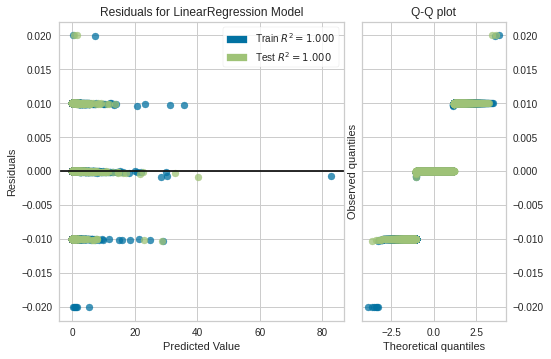

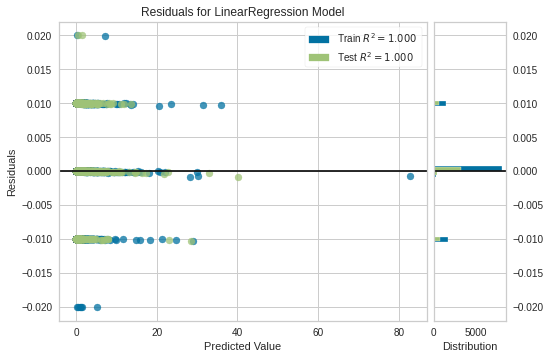

Text(0, 0.5, 'Frequency')

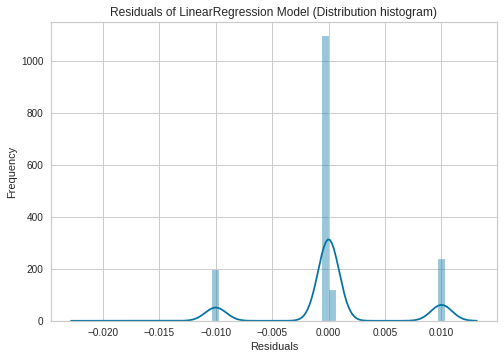

In [39]:
#Plot outputs
#import os
#os.system("pip install yellowbrick")
from yellowbrick.regressor import ResidualsPlot
import warnings
warnings.filterwarnings('ignore')

model = lin_mod

#Visualise with QQ plot
visualizer = ResidualsPlot(model, hist=False, qqplot=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


#Visualise with Histogram distribution plot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


#Better visual representation of the distribution Histogram 
#compute vector of residuals 
resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
#Plot
sns.distplot(resids)
plt.title('Residuals of LinearRegression Model (Distribution histogram)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [ ]:
#Save model
pickle.dump(model, open('model.pkl', 'wb'))